## DIAMONDS

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=sns.load_dataset('diamonds')

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.corr()["price"]

<ipython-input-4-65aa51e21742>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["price"]


carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

<Axes: >

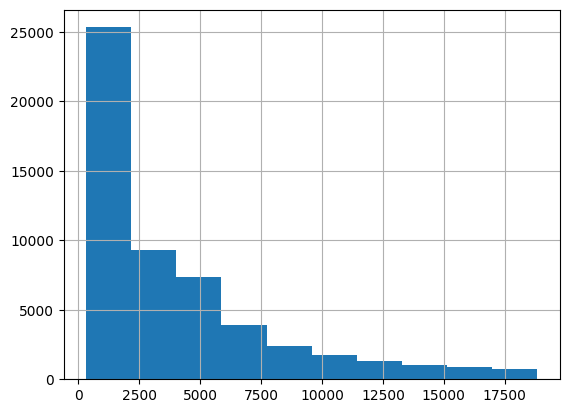

In [5]:
import matplotlib.pyplot as plt
df["price"].hist()

OBSERVACION_01: La variable target, cuenta con tipo de distribucion exponencial.

# Herramienta: SPLIT

Nos permite crear set de entranamiento y set de prueba con un metodo, apartir de un dataframe.

- Usando:
 ```python
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y)
 ```
  Genere un segundo dataset para validar la performance del modelo elegido.

- De forma predefinida, el metodo toma para Train: 75%, y para Test: 25% (se puede modificar).

- Calcule la metrica que corresponda sobre el set de testeo.


In [6]:
# EJERCICI_01: Buscamos el modelo mas optimo.
X= df[['carat','cut','color','clarity','x','y','y']]
y= df['price']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # viene prestablecido 25% tester, y 75% train

In [9]:
import numpy as np

In [10]:
X_train=pd.get_dummies(X_train,drop_first=True) #Transformamos los X_test en numericos.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
# TRAINING
modelo = LinearRegression() # Asignamos nombre
modelo.fit(X_train,y_train) # aprendizaje
y_pred=modelo.predict(X_train) # prediccion
r2_score(y_train, y_pred)

0.9192769529515917

In [13]:
X_test=pd.get_dummies(X_test,drop_first=True) #Transformamos los X_test en numericos.

In [14]:
# TEST
y_pred_test=modelo.predict(X_test)
r2_score(y_pred_test,y_test)

0.9116914169738358